In [79]:
# Packages for analysis

import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
    

# Allows charts to appear in the notebook
%matplotlib inline



In [80]:

data = pd.read_csv('fccbcc.csv')
print(data.shape)
data.head
data.type.value_counts()

(414, 3)


1    216
0    198
Name: type, dtype: int64

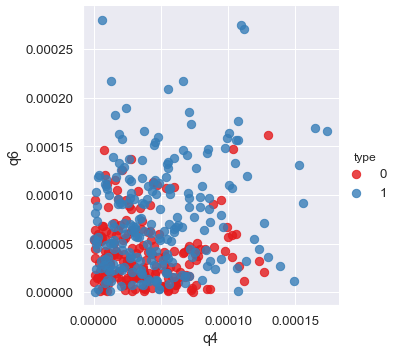

In [81]:
sns.lmplot('q4', 'q6', data=data, hue='type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [82]:
x = data[['q4','q6']].values
#type = np.where(data['type']=='hcp', 0, 1)

y = data['type'].values
#print(y)
                       
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=109)
print(X_train.shape, y_train.shape,y_test.shape)



(310, 2) (310,) (104,)


In [83]:
# Fit the SVM model
model = svm.SVC(C=10)
model.fit(X_train,y_train)


SVC(C=10)

In [84]:
y_pred = model.predict(X_test)
print(y_pred)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1
 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1]
Accuracy: 0.7211538461538461


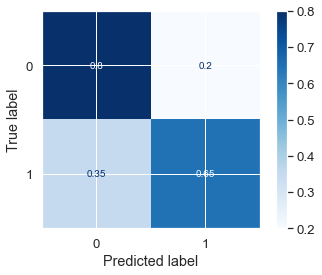

In [85]:
# Predict the test set
predictions = model.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
#plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()


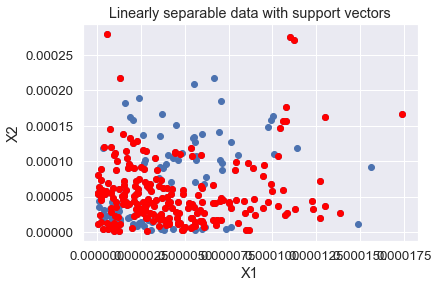

In [86]:
# Get support vectors
support_vectors = model.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [87]:
model.fit(X_train, y_train).score(X_train, y_train)


0.6903225806451613

In [88]:
model.fit(X_test, y_test).score(X_test, y_test)


0.7307692307692307